In [29]:
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from scipy.cluster.vq import whiten, kmeans2

обращаемся к API

In [63]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers={'X-Auth-Token': '33d6fb72faa4484199248101955ee0ff'}).json()
        return json[result_key]
    except:
        print("Ошибка!")
        return None

Получаем команды

In [102]:
teams = call_api('http://api.football-data.org/v1/competitions/398/leagueTable', 'standing')
teams

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/338'}},
  'away': {'draws': 6,
   'goals': 33,
   'goalsAgainst': 18,
   'losses': 2,
   'wins': 11},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/en/6/63/Leicester02.png',
  'draws': 12,
  'goalDifference': 32,
  'goals': 68,
  'goalsAgainst': 36,
  'home': {'draws': 6,
   'goals': 35,
   'goalsAgainst': 18,
   'losses': 1,
   'wins': 12},
  'losses': 3,
  'playedGames': 38,
  'points': 81,
  'position': 1,
  'teamName': 'Leicester City FC',
  'wins': 23},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/57'}},
  'away': {'draws': 7,
   'goals': 34,
   'goalsAgainst': 25,
   'losses': 4,
   'wins': 8},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/en/5/53/Arsenal_FC.svg',
  'draws': 11,
  'goalDifference': 29,
  'goals': 65,
  'goalsAgainst': 36,
  'home': {'draws': 4,
   'goals': 31,
   'goalsAgainst': 11,
   'losses': 3,
   'wins': 12},
  'losses': 7,
  'playedGames': 38,
  'point

In [123]:
for team in teams:
    team_name = call_api(team['_links']['team']['href'], 'name')
    goals = team['goals']
    losses = 0
    if team['away']:  # считаем количество поражений у команды дома и в гостях
        losses += team['away']['losses']
    if team['home']:
        losses += team['home']['losses']
    print('Team "{}", {} goals, {} losses'.format(team_name, goals, losses))
#     team['players'] = team_name
    team['goals'] = goals

Team "Leicester City FC", 68 goals, 3 losses
Team "Arsenal FC", 65 goals, 7 losses
Team "Tottenham Hotspur FC", 69 goals, 6 losses
Team "Manchester City FC", 71 goals, 10 losses
Team "Manchester United FC", 49 goals, 10 losses
Team "Southampton FC", 59 goals, 11 losses
Team "West Ham United FC", 65 goals, 8 losses
Team "Liverpool FC", 63 goals, 10 losses
Team "Stoke City FC", 41 goals, 15 losses
Team "Chelsea FC", 59 goals, 12 losses
Team "Everton FC", 59 goals, 13 losses
Team "Swansea City FC", 42 goals, 15 losses
Team "Watford FC", 40 goals, 17 losses
Team "West Bromwich Albion FC", 34 goals, 15 losses
Team "Crystal Palace FC", 39 goals, 18 losses
Team "AFC Bournemouth", 45 goals, 18 losses
Team "Sunderland AFC", 48 goals, 17 losses
Team "Newcastle United FC", 44 goals, 19 losses
Team "Norwich City FC", 39 goals, 22 losses
Team "Aston Villa FC", 27 goals, 27 losses


In [127]:
team_for_pd = []
for team in teams:
    team_name = call_api(team['_links']['team']['href'], 'name')
    team_for_pd.append({'name': team_name, 'goals': team['goals'], 'losses': team['losses']})
#     print(team)
team_for_pd

[{'goals': 68, 'losses': 3, 'name': 'Leicester City FC'},
 {'goals': 65, 'losses': 7, 'name': 'Arsenal FC'},
 {'goals': 69, 'losses': 6, 'name': 'Tottenham Hotspur FC'},
 {'goals': 71, 'losses': 10, 'name': 'Manchester City FC'},
 {'goals': 49, 'losses': 10, 'name': 'Manchester United FC'},
 {'goals': 59, 'losses': 11, 'name': 'Southampton FC'},
 {'goals': 65, 'losses': 8, 'name': 'West Ham United FC'},
 {'goals': 63, 'losses': 10, 'name': 'Liverpool FC'},
 {'goals': 41, 'losses': 15, 'name': 'Stoke City FC'},
 {'goals': 59, 'losses': 12, 'name': 'Chelsea FC'},
 {'goals': 59, 'losses': 13, 'name': 'Everton FC'},
 {'goals': 42, 'losses': 15, 'name': 'Swansea City FC'},
 {'goals': 40, 'losses': 17, 'name': 'Watford FC'},
 {'goals': 34, 'losses': 15, 'name': 'West Bromwich Albion FC'},
 {'goals': 39, 'losses': 18, 'name': 'Crystal Palace FC'},
 {'goals': 45, 'losses': 18, 'name': 'AFC Bournemouth'},
 {'goals': 48, 'losses': 17, 'name': 'Sunderland AFC'},
 {'goals': 44, 'losses': 19, 'name

In [128]:
team_pd = pd.DataFrame(team_for_pd)
team_pd

,goals,losses,name
0,68,3,Leicester City FC
1,65,7,Arsenal FC
2,69,6,Tottenham Hotspur FC
3,71,10,Manchester City FC
4,49,10,Manchester United FC
5,59,11,Southampton FC
6,65,8,West Ham United FC
7,63,10,Liverpool FC
8,41,15,Stoke City FC
9,59,12,Chelsea FC


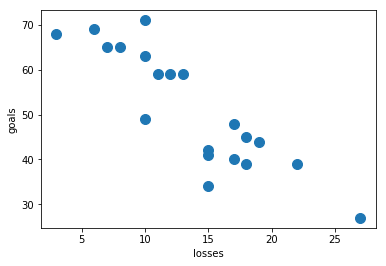

In [129]:
team_pd.plot.scatter(x = 'losses', y = 'goals', s = 100)

In [130]:
del team_pd['name']
team_pd

,goals,losses
0,68,3
1,65,7
2,69,6
3,71,10
4,49,10
5,59,11
6,65,8
7,63,10
8,41,15
9,59,12


In [131]:
whitened = whiten(team_pd.as_matrix())
whitened

array([[ 5.30006023,  0.53010236],
       [ 5.06623405,  1.2369055 ],
       [ 5.3780023 ,  1.06020471],
       [ 5.53388642,  1.76700785],
       [ 3.81916105,  1.76700785],
       [ 4.59858167,  1.94370864],
       [ 5.06623405,  1.41360628],
       [ 4.91034992,  1.76700785],
       [ 3.19562455,  2.65051178],
       [ 4.59858167,  2.12040943],
       [ 4.59858167,  2.29711021],
       [ 3.27356661,  2.65051178],
       [ 3.11768249,  3.00391335],
       [ 2.65003012,  2.65051178],
       [ 3.03974043,  3.18061414],
       [ 3.5073928 ,  3.18061414],
       [ 3.74121899,  3.00391335],
       [ 3.42945074,  3.35731492],
       [ 3.03974043,  3.88741728],
       [ 2.10443568,  4.77092121]])

In [132]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.10988828,  3.23362437],
        [ 4.5050512 ,  1.9790488 ],
        [ 5.26888341,  1.20156534]]),
 array([2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [133]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'b',
 'g',
 'r',
 'g',
 'g',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

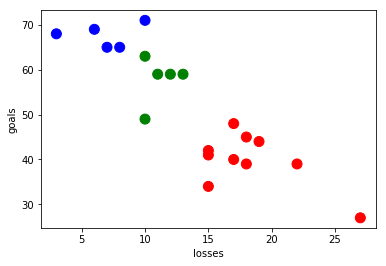

In [135]:
team_pd.plot.scatter(x = 'losses', y = 'goals', c = colors, s = 100)

In [136]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\Users\elf\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 5.20912783,  1.29580576],
        [ 4.11146572,  2.66853433],
        [ 3.24433834,  2.95973816],
        [ 4.40372652,  2.03205903],
        [ 2.57208805,  4.32916924]]),
 array([0, 0, 0, 0, 3, 3, 0, 0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 4]))

In [137]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'r',
 'y',
 'y',
 'r',
 'r',
 'b',
 'y',
 'y',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'm',
 'm']

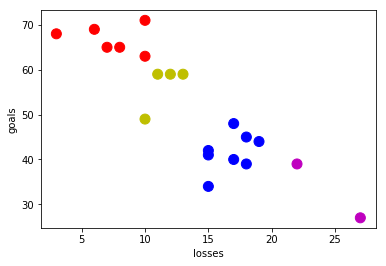

In [138]:
team_pd.plot.scatter(x='losses', y='goals', c=colors, s=100)